# Session 2: Assignment Answer 

Create the following hazards with given information and get hazard values from created hazards
* a model-based tornado
* a dataset-based earthquake

Please follow the instruction at each cell.


## 1. A model-based tornado

Using the data from section 2.2, slightly alter the values of the Centerville tornado and obtain a new set of
parameters that differ from the previously seen examples.

Tornado model definition:
* Tornado Model: MeanWidthTornado
* EF Rating: EF3
* Start point of path: 
    * Latitude:
    * Longitude: 
* End point of path:
    * Latitude:
    * Longitude: 
* Wind speed method: 1
* number of simulation: 1
* random seed: 2021

After you have obtained them, proceed as shown during the session.

In [1]:
# Import modules
from pyincore import HazardService, IncoreClient
import json

In [2]:
# Connect to IN-CORE serivce by creating IncoreClient
client = IncoreClient()

# Create the HazardService object
hazardsvc = HazardService(client)

Enter username: vnarah2
Enter password: ········
Connection successful to IN-CORE services. pyIncore version detected: 0.9.3


In [3]:
# TODO: create a JSON (dictionary) definition of tornado model as given above
my_tornado_model = {
  "name": "Centerville Model Tornado - workshop exercise",
  "description": "Centerville mean width tornado hazard",
  "tornadoType": "model",
  "tornadoModel" : "MeanWidthTornado",
      "tornadoParameters" : {
      "efRating" : "EF3",
      "startLatitude" : "35.215",
      "startLongitude" : "-97.524",
      "randomSeed" : "2021",
      "endLatitude" : [35.253],
      "endLongitude" : [-97.432],
      "windSpeedMethod" : "1",
      "numSimulations" : "1"
    }
}

tornado_model_json = json.dumps(my_tornado_model)

In [4]:
# TODO: create a tornado with definition 
model_response = hazardsvc.create_tornado_scenario(tornado_model_json)


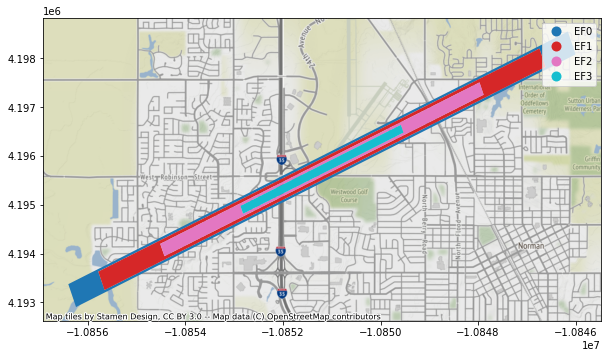

In [5]:
# TODO: acquire hazard id you created and visualize
tornado_model_id = model_response["id"]
from pyincore_viz.geoutil import GeoUtil as viz
viz.plot_tornado(tornado_model_id, client, basemap=True)

In [6]:
# TODO: Getting and printing hazard value from your tornado
points = [
    {
        "demands": ["wind"],
        "units": ["mph"],
        "loc": "35.215, -97.521"
    },
    {
        "demands": ["wind"],
        "units": ["mph"],
        "loc": "35.228, -97.490"
    }
]

tornado_model_vals = hazardsvc.post_tornado_hazard_values(tornado_model_id, points)
print(json.dumps(tornado_model_vals, indent=4, sort_keys=False))


[
    {
        "hazardValues": [
            65.19653087157995
        ],
        "demands": [
            "Wind"
        ],
        "units": [
            "mph"
        ],
        "loc": "35.215, -97.521"
    },
    {
        "hazardValues": [
            111.23396532330945
        ],
        "demands": [
            "Wind"
        ],
        "units": [
            "mph"
        ],
        "loc": "35.228, -97.49"
    }
]


## 2. A dataset-based earthquake

Now, using the dataset-driven earthquake definition seen in section 3.3, define a new earthquake hazard.

Geotiff files are provided in the folder and here are description of each GeoTiff:
* pga-prob.tif
    * hazard type: 
    * demand type:
    * demand unit:
    * period:
    * recurrenceInterval: 50
    * recurrenceUnit: years
* sa-035-prob.tif
    * hazard type: 
    * demand type:
    * demand unit:
    * period:
    * recurrenceInterval: 50
    * recurrenceUnit: years  

Note - since these are probabilistic earthquake hazards, eqParameters is not part of the description and is replaced by recurrence information. The rest is the similar to section 3.3. A complete dataset-driven hazard consists of these two files.

Proceed as in the prior exercise.


In [7]:
# TODO: create a JSON (dictionary) definition of dataset-based earthquake
my_eq_dataset = {
        "eqType": "dataset",
        "name": "Sample Probabilistic EQ 50yr - workshop",
        "description": "Dataset based probabilistic earthquake hazard 50yr",
        "hazardDatasets": [
        {
            "hazardType": "probabilistic",
            "demandType": "PGA",
            "demandUnits": "g",
            "period": 0,
            "recurrenceInterval": 50,
            "recurrenceUnit": "years"
        },
        {
            "hazardType": "probabilistic",
            "demandType": "SA",
            "demandUnits": "g",
            "period": 0.35,
            "recurrenceInterval": 50,
            "recurrenceUnit": "years"
        }
    ]
}
eq_dataset_json = json.dumps(my_eq_dataset)

file_paths = ["pga-prob.tif", "sa-035-prob.tif"]

In [8]:
# TODO: create a earthquake with definition and files
eq_dataset_response = hazardsvc.create_earthquake(eq_dataset_json, file_paths)
print(json.dumps(eq_dataset_response, indent=4, sort_keys=False))


{
    "eqType": "dataset",
    "id": "60ac6acb09212c7553ed92d7",
    "name": "Sample Probabilistic EQ 50yr - workshop",
    "description": "Dataset based probabilistic earthquake hazard 50yr",
    "date": "2021-05-25T03:11:06+0000",
    "creator": "vnarah2",
    "spaces": [
        "vnarah2"
    ],
    "hazardDatasets": [
        {
            "hazardType": "probabilistic",
            "datasetId": "60ac6aca93b4f34f0bf2922f",
            "demandType": "PGA",
            "demandUnits": "g",
            "period": 0.0,
            "recurrenceInterval": 50,
            "recurrenceUnit": "years"
        },
        {
            "hazardType": "probabilistic",
            "datasetId": "60ac6acbc157585793efc84e",
            "demandType": "SA",
            "demandUnits": "g",
            "period": 0.35,
            "recurrenceInterval": 50,
            "recurrenceUnit": "years"
        }
    ]
}


/Users/vnarah2/opt/miniconda3/envs/pyincore/lib/python3.7/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


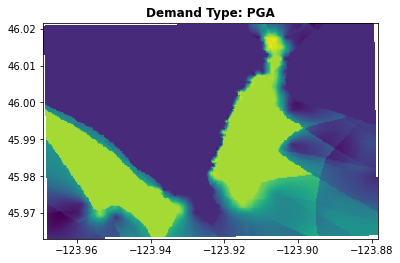

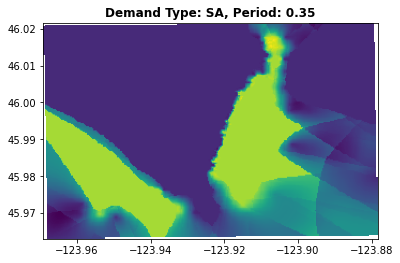

In [9]:
# TODO: acquire hazard id you created and visualize
eq_dataset_id = eq_dataset_response['id']
viz.plot_earthquake(eq_dataset_id, client, "PGA")
viz.plot_earthquake(eq_dataset_id, client, "0.35 SA")


In [10]:
# TODO: Getting and printing hazard value from your tornado
points = [
    {
        "demands": ["0.35 SA"],
        "units": ["g"],
        "loc": "46.00, -123.94"
    },
    {
        "demands": ["PGA"],
        "units": ["g"],
        "loc": "45.98, -123.90"
    },
]
eq_dataset_vals = hazardsvc.post_earthquake_hazard_values(eq_dataset_id, points)
print(json.dumps(eq_dataset_vals, indent=4, sort_keys=False))


[
    {
        "hazardValues": [
            1.149999976158142
        ],
        "demands": [
            "0.35 SA"
        ],
        "units": [
            "g"
        ],
        "loc": "46.0, -123.94"
    },
    {
        "hazardValues": [
            1.2269784212112427
        ],
        "demands": [
            "PGA"
        ],
        "units": [
            "g"
        ],
        "loc": "45.98, -123.9"
    }
]
